# Import necessary libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats

# Upload data

In [2]:
df = pd.read_csv('data/COVID19_state.csv')
df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [3]:
df.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Population', 'Pop Density',
       'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians',
       'Hospitals', 'Health Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+',
       'School Closure Date'],
      dtype='object')

In [52]:
df_daily = pd.read_csv('data/us_states_covid19_daily.csv')
df_daily.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [5]:
df_daily.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

# Data Analysis
#### It is the part where we explore our data in order to find out what general trends and distributions are.

This part is aimed to answer the following questions:
- How has been the evolution on the number of cases over time?
- Do tests seem to have some effect?
- What are the subgroups that suffered most?
- If we were to do confinement measures by subgroups of populations, on which groups should we focus to stop the contagion early?

/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_36540/5857829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')


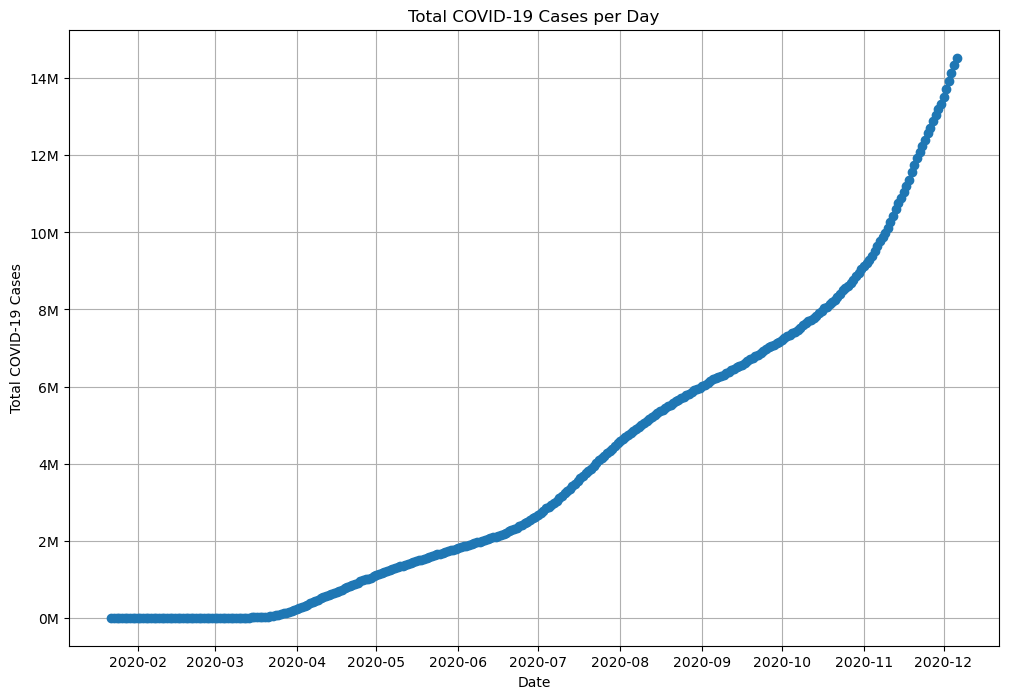

In [92]:
# Total number of daily confirmed cases (line chart, df_daily)

# A custom function to format y-axis labels as millions
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1e6:.0f}M'

daily_df = df_daily[['date', 'positive']]

# Convert the 'date' column to a datetime format
daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')

# Group the data by date and calculate the total number of cases per day
daily_total_cases = daily_df.groupby('date')['positive'].sum()

# Create the line chart
plt.figure(figsize=(12, 8))
plt.plot(daily_total_cases.index, daily_total_cases, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Cases')
plt.title('Total COVID-19 Cases per Day')

# Format the y-axis labels using the custom function
plt.gca().yaxis.set_major_formatter(millions)

plt.grid(True)

plt.show()


/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_36540/1259133482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')


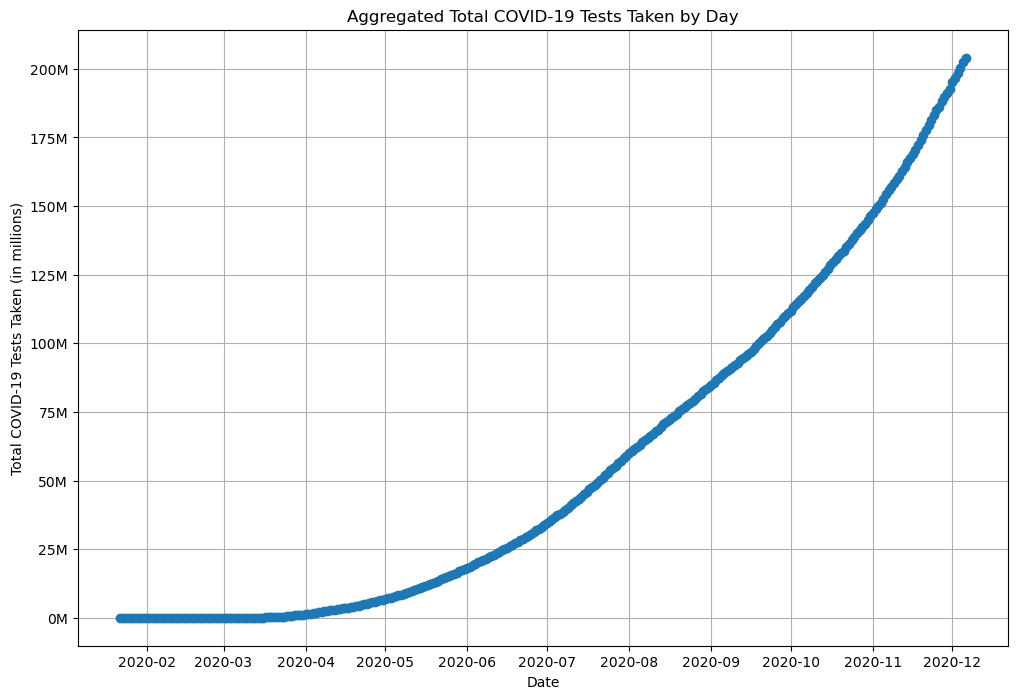

In [43]:
# Total number of tests taken, df_daily

daily_df = df_daily[['date', 'totalTestResults']]

# Convert the 'date' column to a datetime format
daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')

# Aggregate the data by date and sum the total number of tests taken
daily_aggregated = daily_df.groupby('date')['totalTestResults'].sum().reset_index()

# Create the line chart for the aggregated total number of tests taken
plt.figure(figsize=(12, 8))
plt.plot(daily_aggregated['date'], daily_aggregated['totalTestResults'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Tests Taken (in millions)')

# Format the y-axis labels as '2M' for millions
y_format = mtick.FuncFormatter(lambda x, _: f'{int(x/1e6):,}M')
plt.gca().yaxis.set_major_formatter(y_format)

plt.title('Aggregated Total COVID-19 Tests Taken by Day')
plt.grid(True)

plt.show()


/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_36540/3711497530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')
/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_36540/3711497530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_df['PercentagePositive'] = (daily_df['positive'] / daily_df['totalTestResults']) * 100


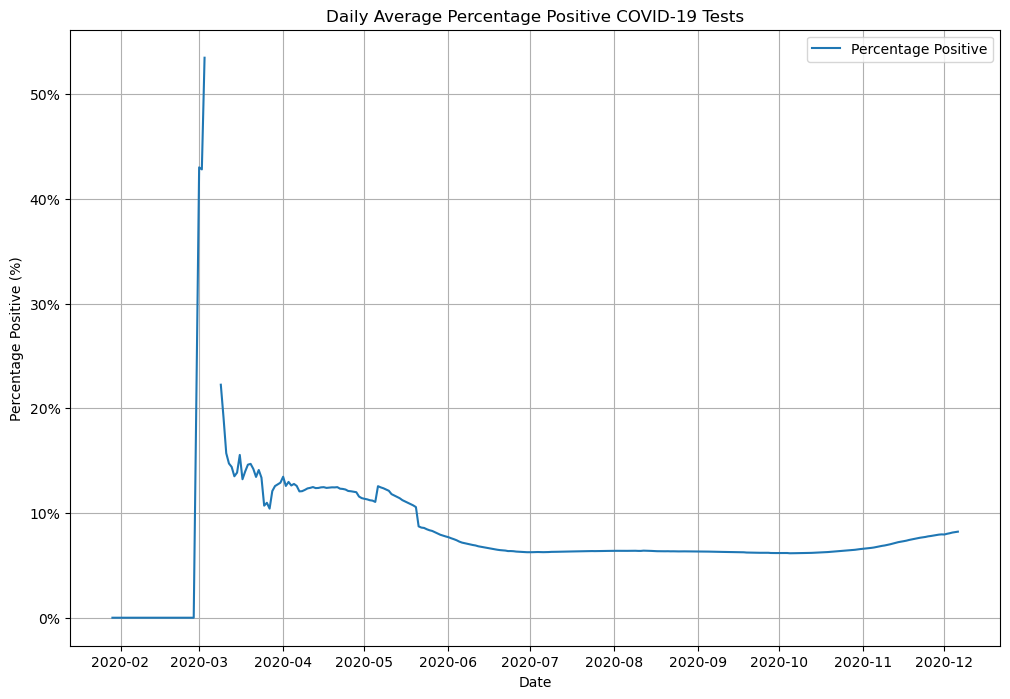

In [93]:
# Percentage of positive tests out of all tests that were taken, df_daily

daily_df = df_daily[['date', 'positive', 'totalTestResults']]

# Convert the 'date' column to a datetime format
daily_df['date'] = pd.to_datetime(daily_df['date'], format='%Y%m%d')

# Calculate the percentage of positive tests out of all tests
daily_df['PercentagePositive'] = (daily_df['positive'] / daily_df['totalTestResults']) * 100

# Aggregate the data by date and calculate the daily average percentage positive
daily_aggregated = daily_df.groupby('date')['PercentagePositive'].mean().reset_index()


# Create the line chart for the moving average of daily average percentage positive
plt.figure(figsize=(12, 8))
plt.plot(daily_aggregated['date'], daily_aggregated['PercentagePositive'], label='Percentage Positive')
plt.xlabel('Date')
plt.ylabel('Percentage Positive (%)')
plt.title('Daily Average Percentage Positive COVID-19 Tests')

# Format the y-axis labels for the percentage
y_format = mtick.PercentFormatter()
plt.gca().yaxis.set_major_formatter(y_format)

plt.grid(True)
plt.legend()

plt.show()


/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_36540/468315120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_df['IncidenceRate'] = (state_df['Infected'] / state_df['Population']) * 100000


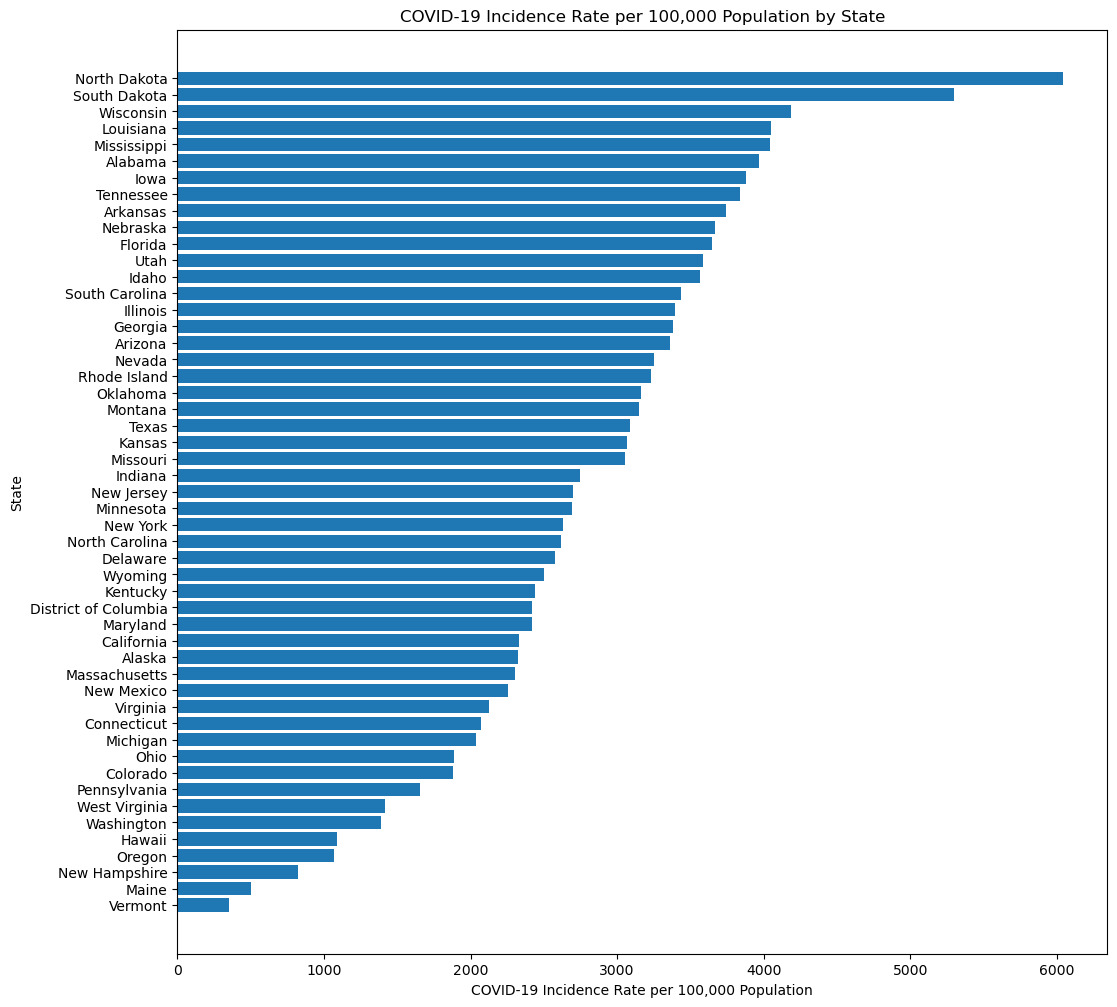

In [71]:
# State-wise COVID-19 cases per 100k population, df

state_df = df[['State', 'Infected', 'Population']]

# Calculate the incidence rate (cases per 100,000 population)
state_df['IncidenceRate'] = (state_df['Infected'] / state_df['Population']) * 100000

# Sort the data by incidence rate in descending order
state_df = state_df.sort_values(by='IncidenceRate', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 12))
plt.barh(state_df['State'], state_df['IncidenceRate'])
plt.xlabel('COVID-19 Incidence Rate per 100,000 Population')
plt.ylabel('State')
plt.title('COVID-19 Incidence Rate per 100,000 Population by State')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rate at the top

plt.show()



/var/folders/k_/pt0pmhm97jx4hphkj9n4303w0000gn/T/ipykernel_36540/504754212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_deaths_df['date'] = pd.to_datetime(daily_deaths_df['date'], format='%Y%m%d')


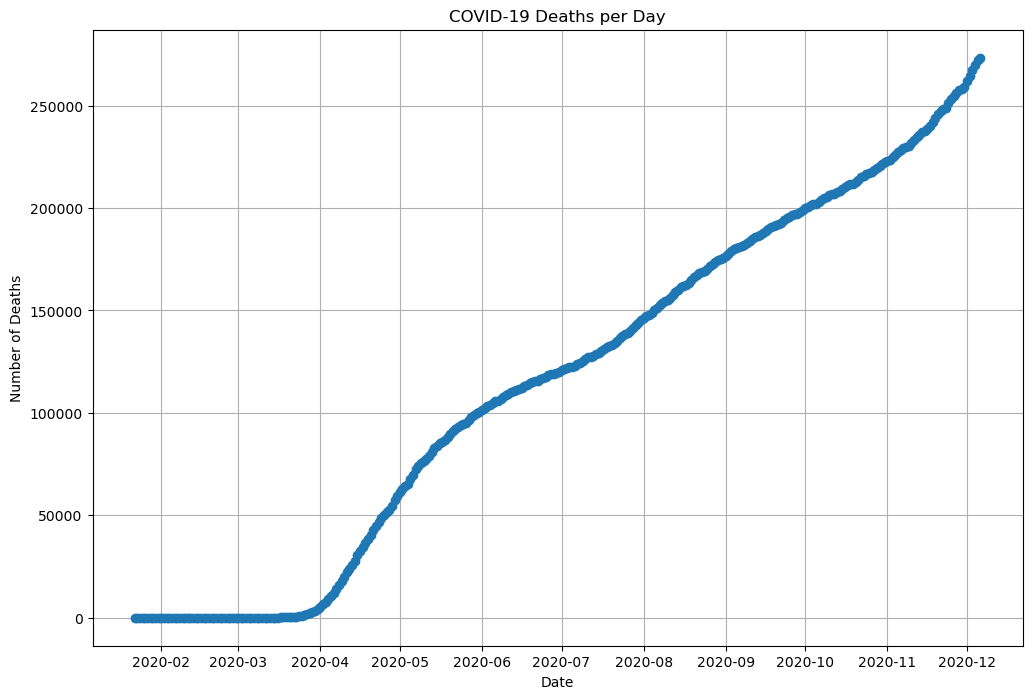

In [74]:
# Number of deaths per day, df_daily

daily_deaths_df = df_daily[['date', 'death']]

# Convert the 'date' column to a datetime format
daily_deaths_df['date'] = pd.to_datetime(daily_deaths_df['date'], format='%Y%m%d')

# Group the data by date and sum the daily death counts
daily_deaths_aggregated = daily_deaths_df.groupby('date')['death'].sum().reset_index()

# Create the line chart for the number of deaths per day
plt.figure(figsize=(12, 8))
plt.plot(daily_deaths_aggregated['date'], daily_deaths_aggregated['death'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths per Day')

plt.grid(True)

plt.show()


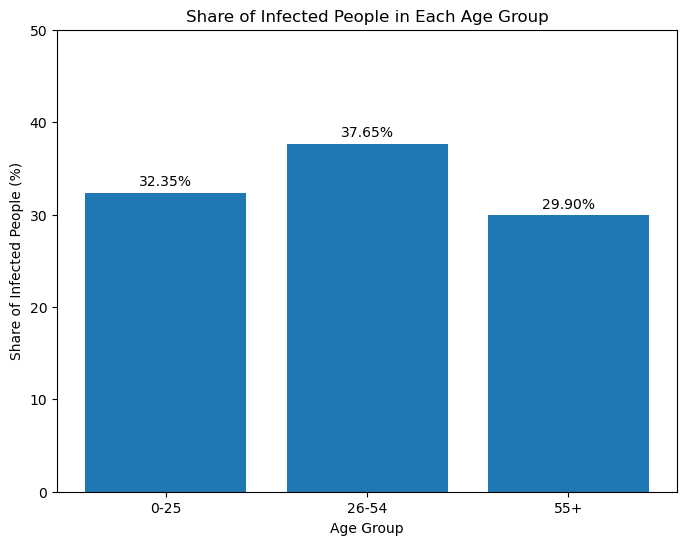

In [25]:
# Share of population
# df dataset

share_infected_0_25 = df['Age 0-25'].mean() * 100
share_infected_26_54 = df['Age 26-54'].mean() * 100
share_infected_55_plus = df['Age 55+'].mean() * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['0-25', '26-54', '55+'], [share_infected_0_25, share_infected_26_54, share_infected_55_plus])
plt.xlabel('Age Group')
plt.ylabel('Share of Infected People (%)')
plt.title('Share of Infected People in Each Age Group')
plt.ylim(0, 50)  # Set y-axis limit to represent percentages (0-100)

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()


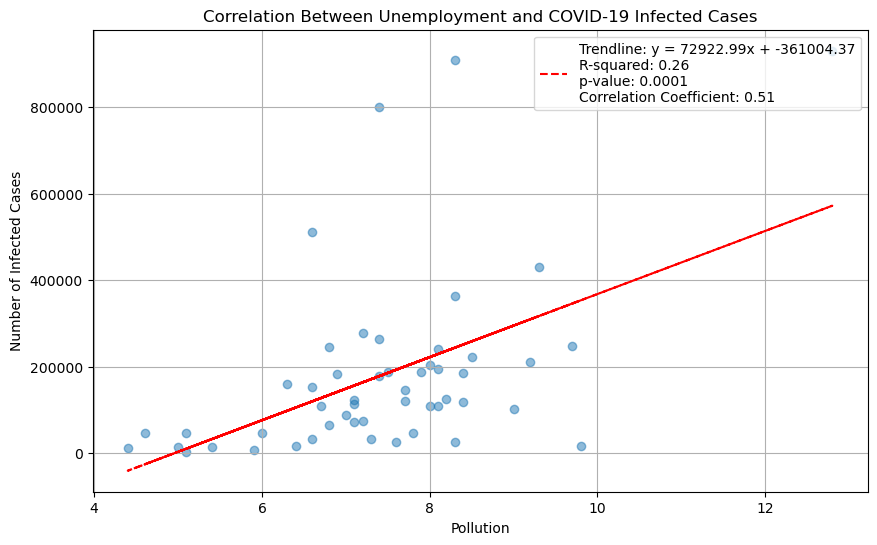

In [87]:
# Correlation Between Unemployment and COVID-19 Infected Cases
# df dataset

data_df = df[['Infected', 'Pollution']]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Pollution'], data_df['Infected'], alpha=0.5)
plt.xlabel('Pollution')
plt.ylabel('Number of Infected Cases')
plt.title('Correlation Between Unemployment and COVID-19 Infected Cases')

# Calculate the correlation coefficient
correlation_coefficient, _ = stats.pearsonr(data_df['Pollution'], data_df['Infected'])


# Calculate the trendline parameters, R-squared, and p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['Pollution'], data_df['Infected'])
trendline = f'Trendline: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}\np-value: {p_value:.4f}\nCorrelation Coefficient: {correlation_coefficient:.2f}'

# Add the trendline, its formula, and the p-value to the plot
plt.plot(data_df['Pollution'], slope * data_df['Pollution'] + intercept, color='red', linestyle='--', label=trendline)
plt.legend(loc='upper right')

plt.grid(True)

plt.show()


# as p-value < 0.05 -> the model is significant:
# the higher the pollution -> the higher the number of infected cases (with correlation of 0.51 - moderate correlation)


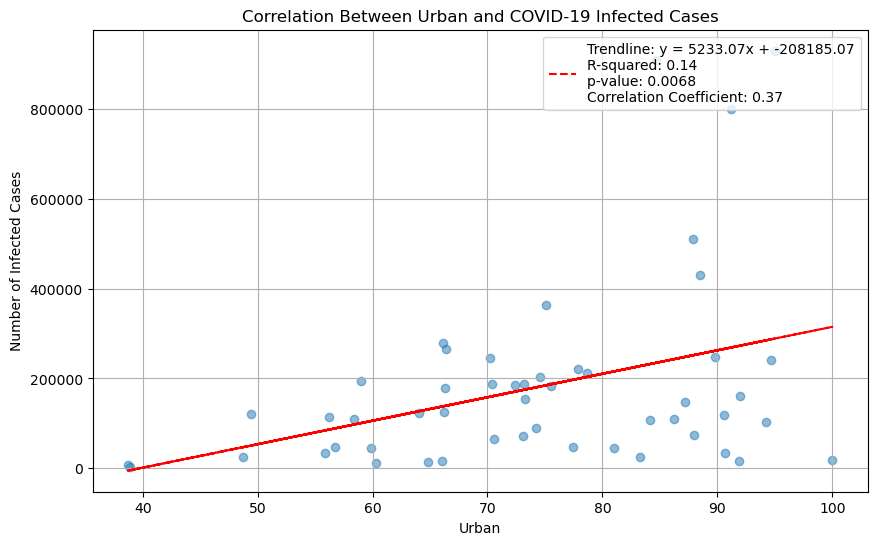

In [95]:
# Correlation Between Urban and COVID-19 Infected Cases
# df dataset


data_df = df[['Infected', 'Urban']]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Urban'], data_df['Infected'], alpha=0.5)
plt.xlabel('Urban')
plt.ylabel('Number of Infected Cases')
plt.title('Correlation Between Urban and COVID-19 Infected Cases')

# Calculate the correlation coefficient
correlation_coefficient, _ = stats.pearsonr(data_df['Urban'], data_df['Infected'])


# Calculate the trendline parameters, R-squared, and p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['Urban'], data_df['Infected'])
trendline = f'Trendline: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}\np-value: {p_value:.4f}\nCorrelation Coefficient: {correlation_coefficient:.2f}'

# Add the trendline, its formula, and the p-value to the plot
plt.plot(data_df['Urban'], slope * data_df['Urban'] + intercept, color='red', linestyle='--', label=trendline)
plt.legend(loc='upper right')

plt.grid(True)

plt.show()



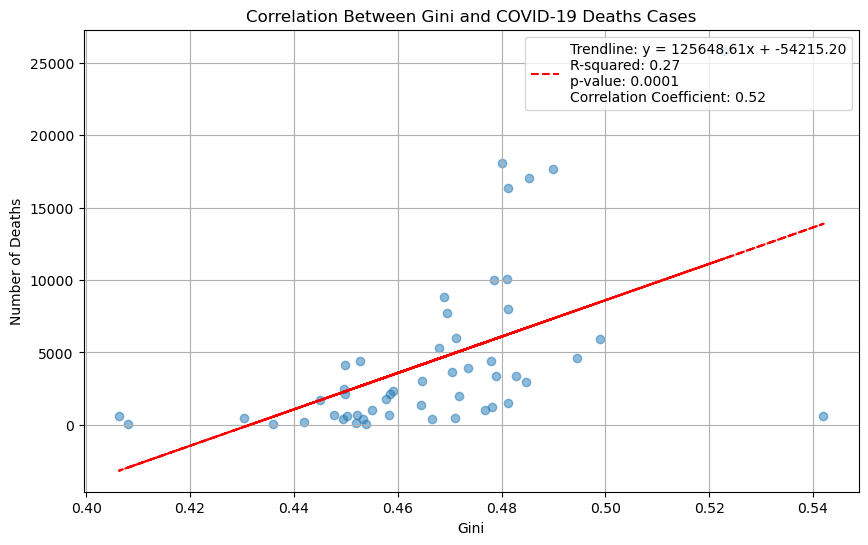

In [96]:
# Correlation Between Gini and COVID-19 Deaths Cases
# df dataset

data_df = df[['Deaths', 'Gini']]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_df['Gini'], data_df['Deaths'], alpha=0.5)
plt.xlabel('Gini')
plt.ylabel('Number of Deaths')
plt.title('Correlation Between Gini and COVID-19 Deaths Cases')

# Calculate the correlation coefficient
correlation_coefficient, _ = stats.pearsonr(data_df['Gini'], data_df['Deaths'])


# Calculate the trendline parameters, R-squared, and p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['Gini'], data_df['Deaths'])
trendline = f'Trendline: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {r_value**2:.2f}\np-value: {p_value:.4f}\nCorrelation Coefficient: {correlation_coefficient:.2f}'

# Add the trendline, its formula, and the p-value to the plot
plt.plot(data_df['Gini'], slope * data_df['Gini'] + intercept, color='red', linestyle='--', label=trendline)
plt.legend(loc='upper right')

plt.grid(True)

plt.show()


# Correlation between Gini and Deaths - the higher inequality - the higher num of deaths


# Model

This part contains a simultion of a simple model of contagion.

There is a total population of 1000 people. Each one can infect 3 other individuals per day with a probability of 0.05 (let's assume that they are totally independent). There are 10 persons initially infected.

- Simulate and plot the number of infected persons in the next 3 days.


After 3 days the people infected were around: 15, with the following distribution: 


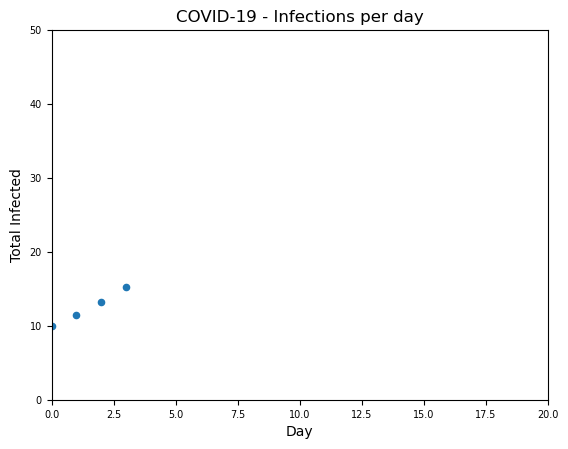

In [15]:
# How many people were infected after 3 days?
total_byday = 10
infected = [10]
day = [0]
for i in range (3):
    total_byday += total_byday*0.05*3
    infected.append(total_byday)
    day.append(i+1)
data = [day, infected]
column_names = ['Day', 'Total Infected']
data = pd.DataFrame(list(zip(day, infected)),  columns=column_names)
data.plot(x='Day', y='Total Infected', kind='scatter', fontsize= 7)
plt.xlabel('Day')
plt.ylabel('Total Infected')
plt.title('COVID-19 - Infections per day')
plt.ylim(0,50)
plt.xlim(0,20)
print(f"After 3 days the people infected were around: {round(total_byday)}, with the following distribution: ")
plt.show()




- How many days will it take for the full population to be infected?

The total population was infected in: 33 days
The distribution of the infection of the total population would be the following:


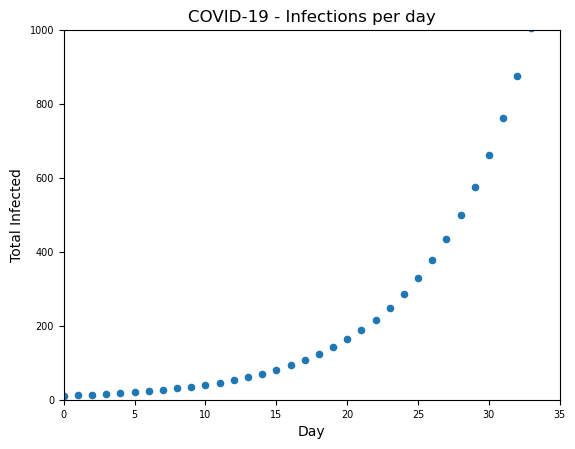

In [16]:
# How many days will it take for the full population to be infected?
i = 4
while (total_byday <= 1000):
    total_byday += total_byday*0.05*3
    infected.append(total_byday)
    day.append(i)
    i+=1
print(f"The total population was infected in: {day[-1]} days")
print("The distribution of the infection of the total population would be the following:")
column_names = ['Day', 'Total Infected']
data = pd.DataFrame(list(zip(day, infected)),  columns=column_names)
data.plot(x='Day', y='Total Infected', kind='scatter', fontsize= 7)
plt.xlabel('Day')
plt.ylabel('Total Infected')
plt.title('COVID-19 - Infections per day')
plt.ylim(0,1000)
plt.xlim(0,35)
plt.show()


Let's simulate a policy.

Suposse we introduce vaccination at period 3. The implications of the vaccine are only for those that are still uninfected. For simplicity, their inmunity is modeled as a reduction in the probability that they get infected of 0.01 pp. 
- How many infections result in the 10th day?

If a vaccine was introduced at day 3, after 10 days the total population infected will be about: 19 people
The total population was infected in: 145 days
The distribution of the infection of the total population would be the following:


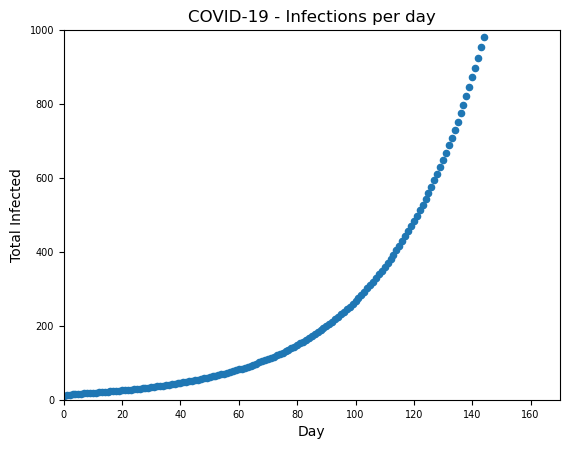

In [20]:
# How many infections will there be in the 10th day if a vaccine was introduced at day 3?
total_byday = 10
infected = [10]
day = [0]
for i in range (3):
    total_byday += total_byday*0.05*3
    infected.append(total_byday)
    day.append(i+1)
# Then vaccine was introduced
i = 4
while (i <= 10):
    total_byday += total_byday*0.01*3
    infected.append(total_byday)
    day.append(i)
    i+=1
print(f"If a vaccine was introduced at day 3, after 10 days the total population infected will be about: {round(infected[-1])} people")
while(total_byday<= 1000):
    total_byday += total_byday*0.01*3
    infected.append(total_byday)
    day.append(i)
    i+=1
print(f"The total population was infected in: {day[-1]} days")
print("The distribution of the infection of the total population would be the following:")
column_names = ['Day', 'Total Infected']
data = pd.DataFrame(list(zip(day, infected)),  columns=column_names)
data.plot(x='Day', y='Total Infected', kind='scatter', fontsize= 7)
plt.xlabel('Day')
plt.ylabel('Total Infected')
plt.title('COVID-19 - Infections per day')
plt.ylim(0,1000)
plt.xlim(0,170)
plt.show()